# **Importing Dependencies**

In [1]:
import os
import numpy as np
from numpy import random
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import classification_report, precision_score, accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

Mounting Google drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading dataset**

In [3]:
data_dir = "/content/drive/MyDrive/Pistachio_Image_Dataset/Pistachio_Image_Dataset/"

In [4]:
images = []
class_labels = []

In [5]:
# Loading images and their labels

for subfolder in os.listdir(data_dir):
    subfolder_path = os.path.join(data_dir, subfolder)

    if os.path.isdir(subfolder_path):
        label = (subfolder)
        for filename in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, filename)
            image = Image.open(image_path)

             ## resizing images
            image = image.resize((180, 180))

            images.append(image)
            class_labels.append(label)

In [ ]:
len(images)

2157

Observation: There are 2157 images in the data set

# **Visualizing Data set**

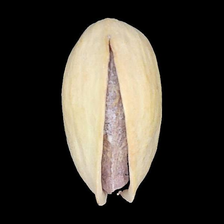

In [ ]:
images[0]

Observation: Showing the first image at the first index of the image list

In [ ]:
print(np.unique(class_labels))

['Kirmizi_Pistachio' 'Siirt_Pistachio']


Observation: There are two types of pistachios in the data set.
Kirmizi_Pistachio and Siirt_Pistachio are the two subclasses.  

In [ ]:
# converting images and labels into a numpy array
X = np.array(images)
y = np.array(class_labels)

In [ ]:
# fucntion to print two random images from the directory

def plot_img(X, y, n):
  images = X
  for i in range (n):
    r = random.randint(2156)        #range of index in array: 0-2156
    # print(r)
    plt.figure(figsize = (10 , 8))
    plt.subplot(3, n, i+1)
    plt.imshow(images[r])
    plt.title(y[r])
    plt.axis("off")
  plt.show();

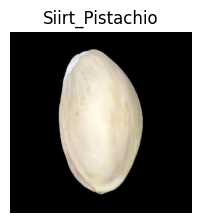

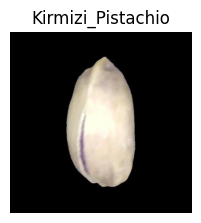

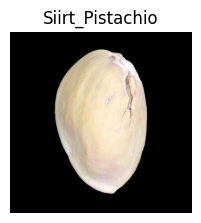

In [ ]:
plot_img(X, y, 3)

In [7]:
unique_labels = np.unique(y)
unique_labels

array(['Kirmizi_Pistachio', 'Siirt_Pistachio'], dtype='<U17')

Converting image array into 3D array

In [8]:
X_stack = np.stack(images)

# **Performing EDA**

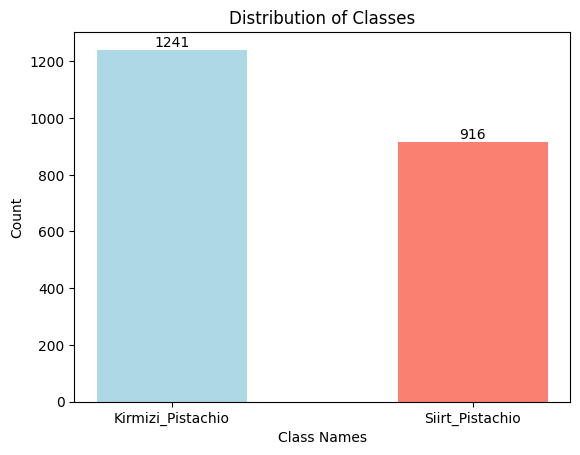

In [ ]:
# Visualizing distribution of classes

unique_classes, class_counts = np.unique(y, return_counts =True)    ##getting class names and no of items in each class

plt.bar(unique_classes, class_counts, width = 0.5, color =["lightblue", "salmon"])

# printing count of classes:
for i, count in enumerate(class_counts):
  plt.text(unique_classes[i], count, str(count), ha='center', va='bottom')

plt.title('Distribution of Classes')
plt.xlabel('Class Names')
plt.ylabel('Count')

plt.show();

Observation: The class of Kirmizi_Pistachio had 1241 images and the class Siirt_Pistachio has 916 images. The data set is imablanced by a difference of 325

**Statistic Description of the image dataset**

In [ ]:
# Statistics of Image data set

mean_pix = np.mean(X_stack).round(2)
#std_pix = np.std(X_stack) #colab session keeps crashing for std
min_pix = np.min(X_stack)
max_pix = np.max(X_stack)

In [ ]:
print("Mean pixel value:", mean_pix)
# print("Std deviation of pixel values: ", std_pix)
print("Min pixel value: ", min_pix)
print("Max pixel value: ", max_pix)

Mean pixel value: 48.1
Min pixel value:  0
Max pixel value:  255


Observation: The mean value of pixels is 48. Minimum pixel value is 0 and Maximum pixel value is 255. (Since images are of RGB format)

Heat map for images

In [ ]:
def img_hm(X, y, index):
  plt.imshow(X[index], cmap='hot', interpolation='nearest')
  plt.colorbar()
  plt.title(f'Heatmap of {y[index]}')
  plt.axis("off")
  plt.show();

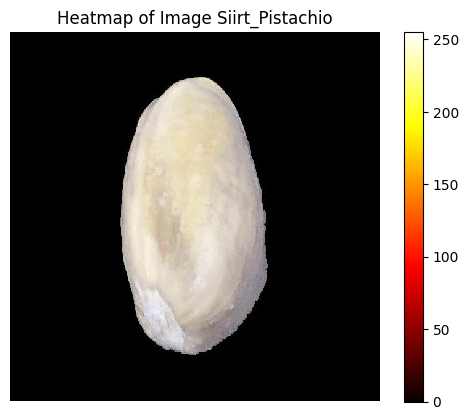

In [ ]:
img_hm(X, y, 5)

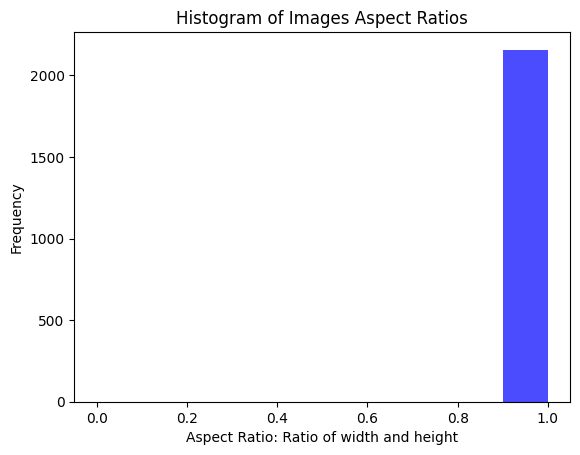

In [ ]:
aspect_ratios = [image.shape[1] / image.shape[0] for image in X_stack]    # rows  / cols

# histogram of aspect ratios
plt.hist(aspect_ratios, bins=10, range=(0, 1), color='blue', alpha=0.7)
plt.xlabel('Aspect Ratio: width to height')
plt.ylabel('Frequency')
plt.title('Histogram of Images Aspect Ratios')
plt.show()

Observation: All images are of the same aspect ratio, they have the height and width of all images are the same

# **Data Preprocessing**

In [ ]:
X_stack.shape

(2157, 180, 180, 3)

Observation: There are 2157 images in the data set, each image is resized to (180, 180) and all images are RGB

In [ ]:
np.unique(y)

array(['Kirmizi_Pistachio', 'Siirt_Pistachio'], dtype='<U17')

In [9]:
# Encoding Y label

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
print(np.unique(y_encoded))

array([0, 1])

In [ ]:
print(f"encoded value: {np.unique(y_encoded)}")
print("class name: ", unique_labels)

encoded value: [0 1]
class name:  ['Kirmizi_Pistachio' 'Siirt_Pistachio']


Result:
1.   Kirmizi is encoded as class 0
2.   Siirt is encoded as class 1



In [ ]:
print("Images shape:", X_stack.shape)
print("Labels shape:", y_encoded.shape)

Images shape: (2157, 600, 600, 3)
Labels shape: (2157,)


# **Splitting Data into Train and Test sets**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_stack, y_encoded, test_size=0.3, random_state=42)

Making tensor flow data from numpy array

In [11]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [ ]:
len(train_dataset)

In [ ]:
len(test_dataset)

**Normalizing Image data set**

In [12]:
X_train_scaled = X_train.astype("float32") / 255.0
X_test_scaled = X_test.astype("float32") / 255.0

In [ ]:
X_train_scaled.shape

(1509, 180, 180, 3)

# **Artificial Neural Network Model**

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (180, 180, 3)),

    keras.layers.Dense(200, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),

    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(25, activation= 'relu'),

    keras.layers.Dense(1, activation = 'sigmoid')

])

In [14]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
              )

In [15]:
history = model.fit(X_train_scaled, y_train, epochs = 5, validation_data = (X_test, y_test))

Epoch 1/5
48/48 [==============================] - 23s 455ms/step - loss: 0.8673 - accuracy: 0.7263 - val_loss: 96.9261 - val_accuracy: 0.7500
Epoch 2/5
48/48 [==============================] - 20s 408ms/step - loss: 0.4879 - accuracy: 0.7853 - val_loss: 74.0367 - val_accuracy: 0.8086
Epoch 3/5
48/48 [==============================] - 27s 558ms/step - loss: 0.4141 - accuracy: 0.8118 - val_loss: 56.8642 - val_accuracy: 0.8333
Epoch 4/5
48/48 [==============================] - 26s 554ms/step - loss: 0.3863 - accuracy: 0.8277 - val_loss: 65.2057 - val_accuracy: 0.8025
Epoch 5/5
48/48 [==============================] - 38s 784ms/step - loss: 0.3829 - accuracy: 0.8257 - val_loss: 62.5953 - val_accuracy: 0.8148


In [58]:
model.save("/content/drive/MyDrive/model")

In [59]:
model_loss, model_acc  = model.evaluate(X_test_scaled, y_test)
print(f"Loss: {round(model_loss, 2)}")
print(f"Accuracy:  {round(model_acc, 2)}")

21/21 [==============================] - 1s 41ms/step - loss: 0.4023 - accuracy: 0.8241
Loss: 0.4
Accuracy:  0.82


# **Precitions with the Trained ANN Model**

In [16]:
pred = model.predict(X_test_scaled)

21/21 [==============================] - 1s 41ms/step


In [17]:
predictions = np.argmax(pred)
print(np.unique(predictions))

[533]


Observation: The model is predicting all images for one class only

In [18]:
class_predictions = (pred > 0.5).astype(int)

In [50]:
print(np.unique(class_predictions))

[0 1]


Observation: Using a threshold (0.5) instead of np.argmax() to save output of model resulted in both class value precitions

# **Plotting Validation and Accuracy Graphs**

In [19]:
# calling history to plot loss curves
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

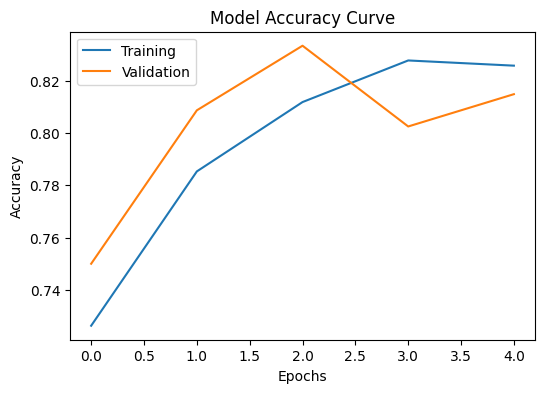

In [20]:
# plotting accracy curve

plt.figure(figsize = (6, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"])
plt.show();

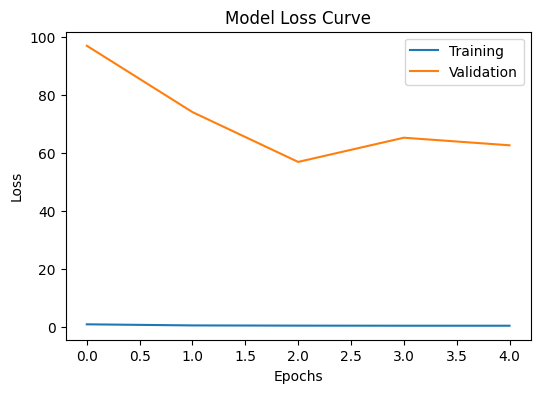

In [21]:
# plotting loss curve

plt.figure(figsize = (6, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training", "Validation"])
plt.show();

# **Data Augmentation**

In [22]:
data_augmentation = keras.Sequential([
    keras.layers.RandomZoom(0.5),
    keras.layers.RandomFlip('horizontal_and_vertical'),
    keras.layers.RandomRotation(factor = (-0.2, 0.3), fill_mode='reflect')
])

In [26]:
model_aug = keras.Sequential([
    data_augmentation,
    keras.layers.Flatten(input_shape = (180, 180, 3)),

    keras.layers.Dense(200, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),

    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(25, activation= 'relu'),

    keras.layers.Dense(1, activation = 'sigmoid')

])

In [27]:
model_aug.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
              )

In [41]:
history_aug = model_aug.fit(X_train_scaled, y_train, epochs = 5, validation_data = (X_test, y_test))

Epoch 1/5
48/48 [==============================] - 33s 687ms/step - loss: 0.5997 - accuracy: 0.6773 - val_loss: 69.4897 - val_accuracy: 0.6157
Epoch 2/5
48/48 [==============================] - 40s 839ms/step - loss: 0.6379 - accuracy: 0.6627 - val_loss: 19.4224 - val_accuracy: 0.7500
Epoch 3/5
48/48 [==============================] - 29s 615ms/step - loss: 0.5860 - accuracy: 0.7031 - val_loss: 36.3557 - val_accuracy: 0.7299
Epoch 4/5
48/48 [==============================] - 29s 601ms/step - loss: 0.5681 - accuracy: 0.7038 - val_loss: 37.0787 - val_accuracy: 0.7500
Epoch 5/5
48/48 [==============================] - 33s 682ms/step - loss: 0.5733 - accuracy: 0.7071 - val_loss: 83.6443 - val_accuracy: 0.6790


In [42]:
pred_aug = model_aug.predict(X_test_scaled)

21/21 [==============================] - 1s 37ms/step


In [ ]:
# pred_aug = np.argmax(pred_aug, axis=1)

In [43]:
class_predictions_aug = (pred_aug > 0.5).astype(int)

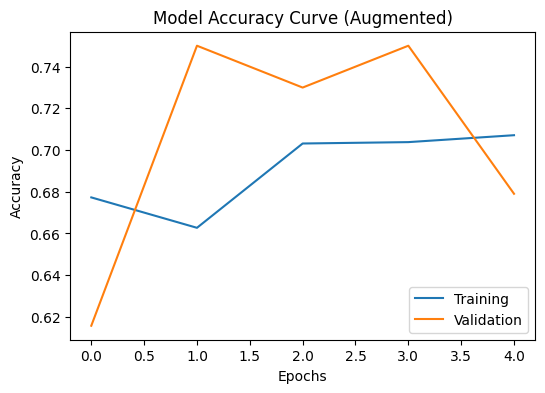

In [45]:
plt.figure(figsize = (6, 4))
plt.plot(history_aug.history['accuracy'])
plt.plot(history_aug.history['val_accuracy'])
plt.title("Model Accuracy Curve (Augmented)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"])
plt.show();

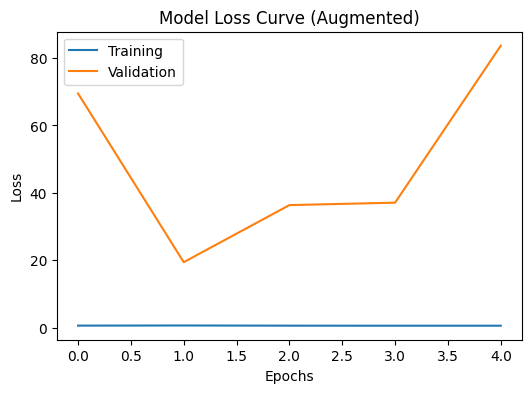

In [46]:
plt.figure(figsize = (6, 4))
plt.plot(history_aug.history['loss'])
plt.plot(history_aug.history['val_loss'])
plt.title("Model Loss Curve (Augmented)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training", "Validation"])
plt.show();

# **Comparing Evaluation of Models with and without Augmentation**

In [31]:
model_loss, model_acc  = model.evaluate(X_test_scaled, y_test)
model_loss_aug, model_acc_aug = model_aug.evaluate(X_test_scaled, y_test)

21/21 [==============================] - 1s 38ms/step - loss: 0.6086 - accuracy: 0.6651


In [47]:
print(f"Loss: {round(model_loss, 2)}")
print(f"Loss with augmentation: {round(model_loss_aug, 2)}")

print(f"\nAccuracy: {round(model_acc, 2)}")
print(f"Accuracy with augmentation: {round(model_acc_aug, 2)}")

Loss: 0.42
Loss with augmentation: 0.61

Accuracy: 0.81
Accuracy with augmentation: 0.67


Observation: Accuracy with data augmentation decreased and loss increased. In this scenario data augmentation is not feasible.

# **Evaluation Metrices**

In [33]:
# performing evaluation on ANN model

acc = np.round(accuracy_score(y_test, class_predictions), 2)
prec = np.round(precision_score(y_test, class_predictions), 2)
recall = np.round(recall_score(y_test, class_predictions), 2)
f1_score = f1_score(y_test, class_predictions)

In [34]:
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall", recall)
print("f1 score: ", f1_score)

Accuracy:  0.81
Precision:  0.88
Recall 0.66
f1 score:  0.756


**Classification Report**

In [35]:
# model without augmentation
report = classification_report(y_test, class_predictions)
print(report);

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       363
           1       0.88      0.66      0.76       285

    accuracy                           0.81       648
   macro avg       0.83      0.80      0.80       648
weighted avg       0.82      0.81      0.81       648



In [36]:
# model with augmentation
report_aug = classification_report(y_test, class_predictions_aug)
print(report_aug);

              precision    recall  f1-score   support

           0       0.63      0.96      0.76       363
           1       0.85      0.29      0.43       285

    accuracy                           0.67       648
   macro avg       0.74      0.62      0.60       648
weighted avg       0.73      0.67      0.62       648



**Confusion Matrix**

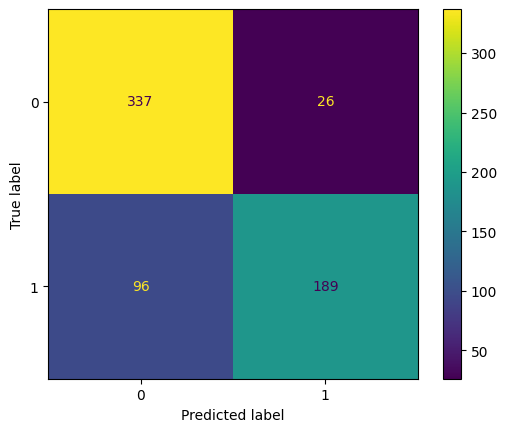

In [37]:
#plotting confusion matrix for ANN model without augmentation

cm = confusion_matrix(y_test, class_predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot();

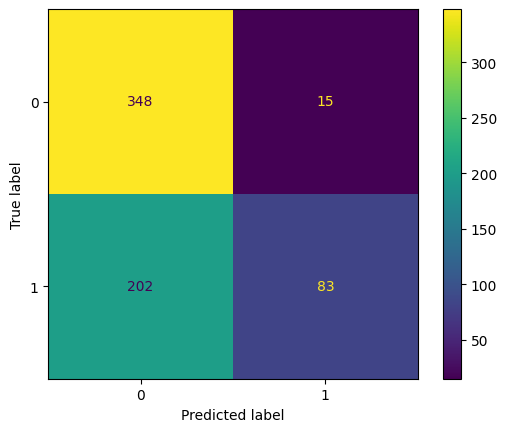

In [39]:
#plotting confusion matrix for ANN model with augmentation

cm = confusion_matrix(y_test, class_predictions_aug)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot();